In [139]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import OrdinalEncoder


In [140]:
file_path = r"C:\Users\Menka\Downloads\prediction_data.xlsx"
sheet_name = 'vw_churndata'
data = pd.read_excel(file_path, sheet_name=sheet_name)
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [141]:
data.shape

(6007, 32)

In [142]:
data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   2710 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               5417 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                4784 non-null   object 
 12  Online_Security              4784 non-null   object 
 13  Online_Backup     

In [144]:
count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(data.index))*100), 'percent of the entire dataset the rows with missing values cannot be excluded.')

Total number of rows with missing values is  5379
since it is only 90 percent of the entire dataset the rows with missing values cannot be excluded.


The dataset contains 5,379 rows with missing values, accounting for approximately 90% of the entire dataset. Given the high proportion of missing data, excluding these rows would result in a significant loss of information. When the percentage of missing data exceeds 5%, it's generally advisable to use imputation techniques to preserve the integrity of the dataset. In this case, missing values can be filled with a placeholder (e.g., 'Missing'), or advanced techniques like supervised or unsupervised learning models can be applied to predict the missing values based on patterns in the data.

However, if the percentage of missing data is less than 5%, simpler imputation methods, such as filling with the mode (for categorical data), can be more appropriate and efficient. This approach helps ensure that the dataset remains as complete as possible without introducing bias from more complex imputation methods.

In [145]:
data.loc[:, ['Churn_Category', 'Churn_Reason', 'Value_Deal', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data']] = data[['Churn_Category', 'Churn_Reason', 'Value_Deal', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data']].fillna('Missing')


In [146]:
# Step 1: Calculate the mode
mode_value = data['Multiple_Lines'].mode()[0]

# Step 2: Fill missing values with the mode
data['Multiple_Lines'].fillna(mode_value, inplace=True)

In [147]:
# lets explore the target feature
data['Customer_Status'].value_counts()

Customer_Status
Stayed     4275
Churned    1732
Name: count, dtype: int64

In [148]:
#When we are describing the data, transpose helps as it brings the statistical terms above as columns.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6007.0,47.289163,16.805110,18.00,33.000,47.00,60.000,84.00
Number_of_Referrals,6007.0,7.439820,4.622369,0.00,3.000,7.00,11.000,15.00
Tenure_in_Months,6007.0,17.394540,10.592920,1.00,8.000,17.00,27.000,36.00
Monthly_Charge,6007.0,65.087598,31.067808,-10.00,35.950,71.10,90.450,118.75
Total_Charges,6007.0,2430.986173,2267.481294,19.10,539.950,1556.85,4013.900,8684.80
Total_Refunds,6007.0,2.038612,8.065520,0.00,0.000,0.00,0.000,49.79
Total_Extra_Data_Charges,6007.0,7.015149,25.405737,0.00,0.000,0.00,0.000,150.00
Total_Long_Distance_Charges,6007.0,797.283311,854.858841,0.00,107.085,470.22,1269.840,3564.72
Total_Revenue,6007.0,3233.246021,2856.181082,21.61,833.685,2367.15,5105.685,11979.34


In [10]:
#Univariate Analysis

In [11]:
#Numerical Variables Univariate Analysis

In [149]:
num_features = data.describe().columns
df_num = data[num_features]

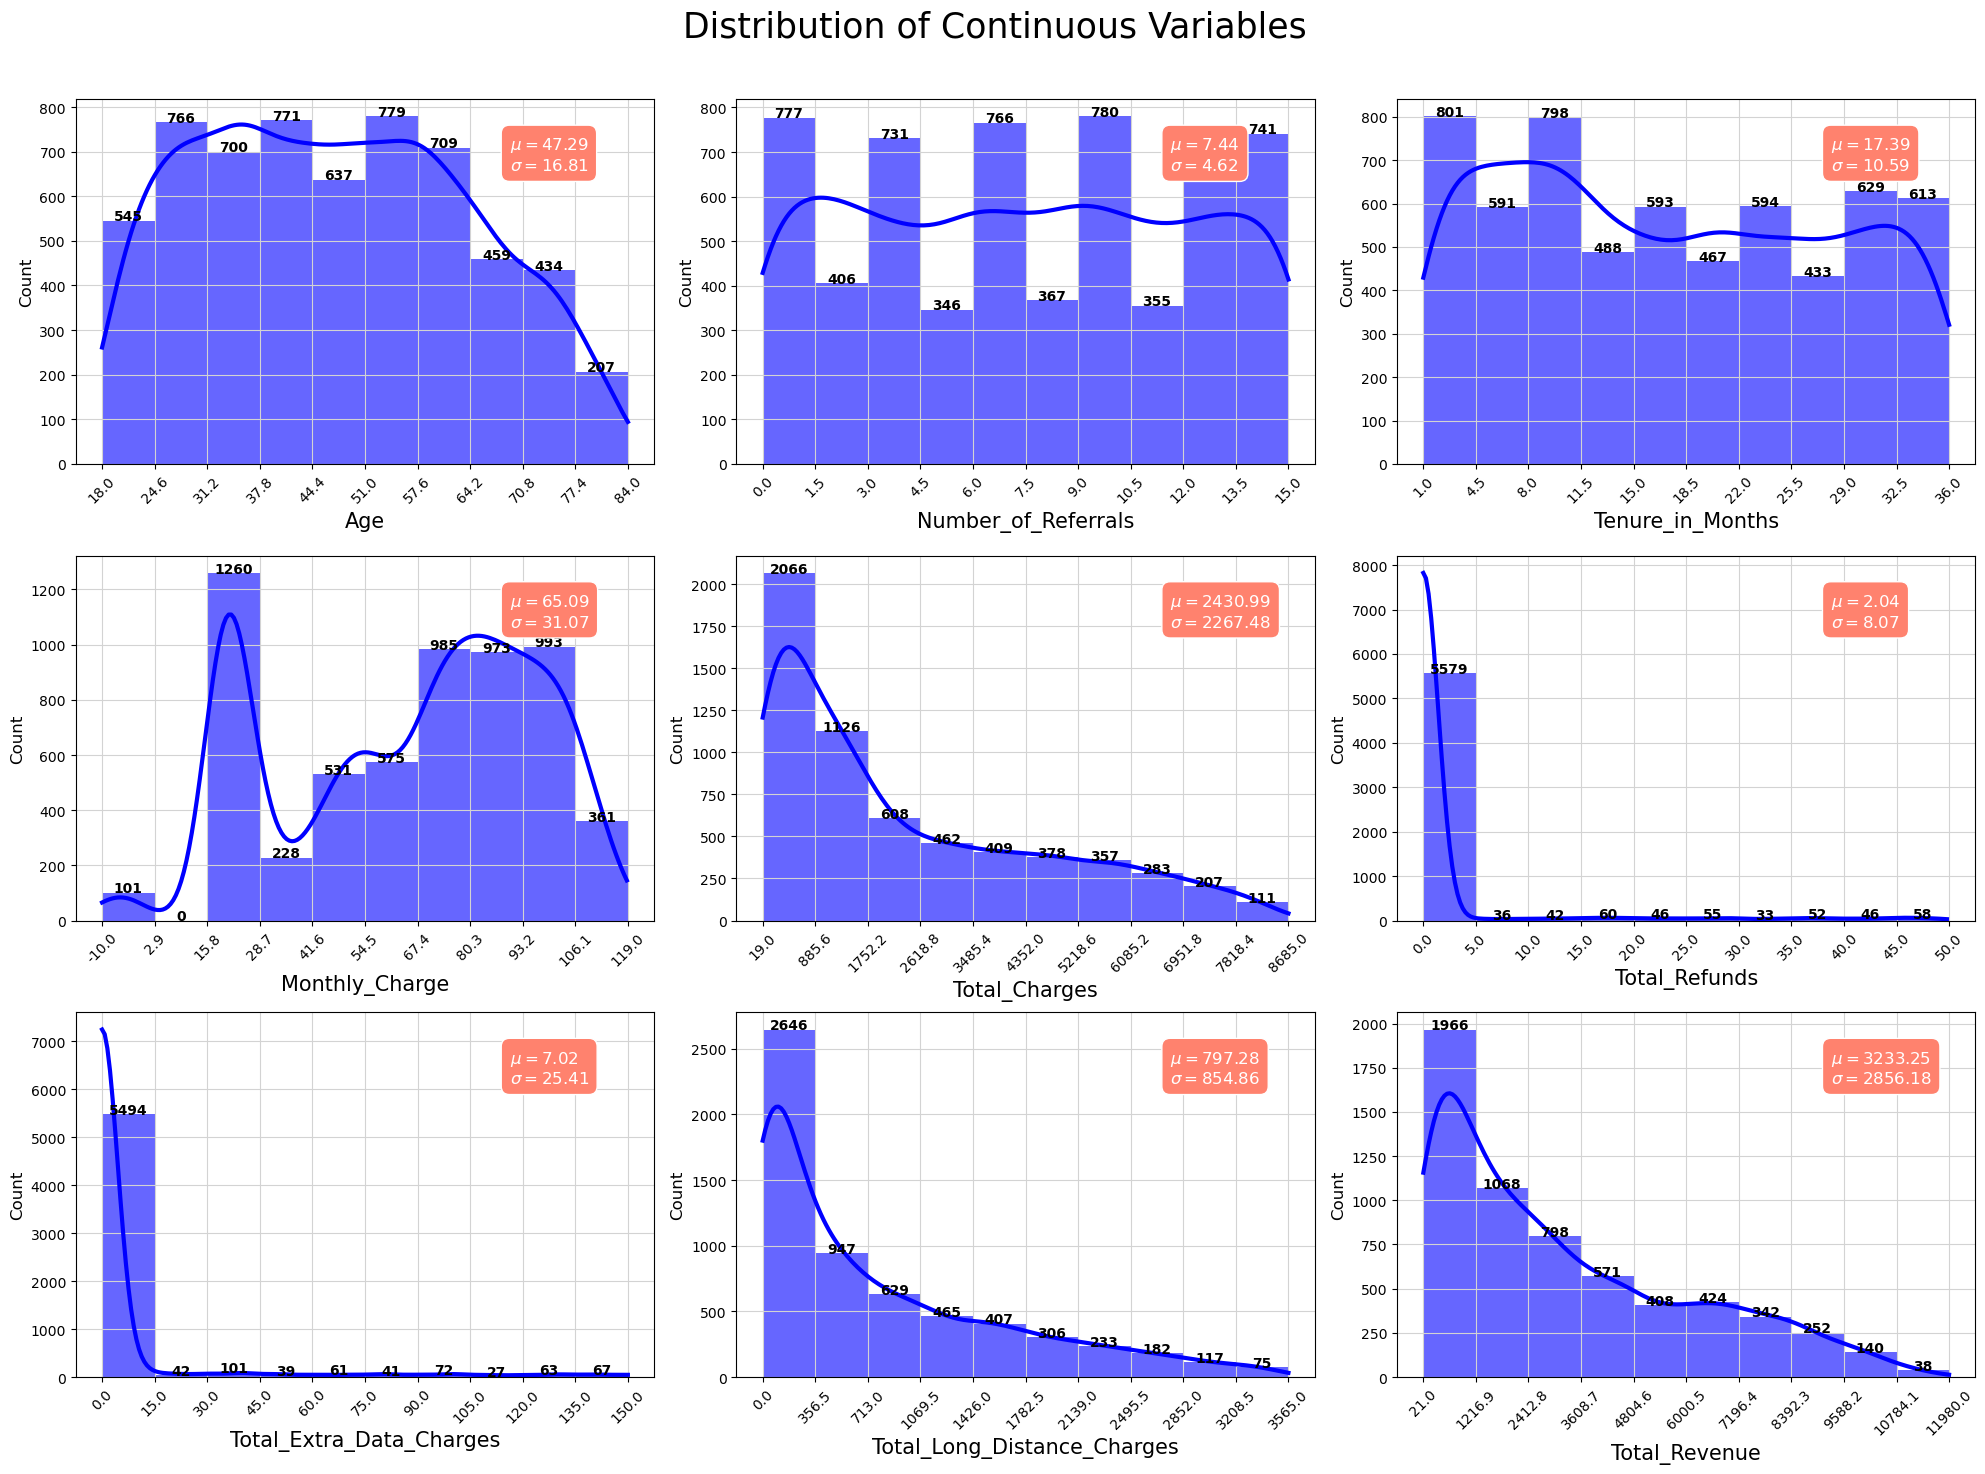

In [150]:

# Determine number of rows needed
num_cols = len(df_num.columns)
num_rows = math.ceil(num_cols / 3)

# Set up the subplot
fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5 * num_rows))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_num.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_num[col], 
                                     range=(np.floor(df_num[col].min()), np.ceil(df_num[col].max())))

    graph = sns.histplot(data=df_num, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='blue', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join(( 
        r'$\mu=%.2f$' % df_num[col].mean(),
        r'$\sigma=%.2f$' % df_num[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

# Hide any unused axes
for i in range(num_cols, num_rows * 3):
    fig.delaxes(ax.flatten()[i])

plt.suptitle('Distribution of Continuous Variables', fontsize=25)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [17]:
#Categorical Variables Univariate Analysis

In [151]:
data.describe(include='object').T

,count,unique,top,freq
Customer_ID,6007,6007,19877-DEL,1
Gender,6007,2,Female,3779
Married,6007,2,No,3012
State,6007,22,Uttar Pradesh,581
Value_Deal,6007,6,Missing,3297
Phone_Service,6007,2,Yes,5417
Multiple_Lines,6007,2,No,3335
Internet_Service,6007,2,Yes,4784
Internet_Type,6007,4,Fiber Optic,2675
Online_Security,6007,3,No,3003


In [19]:
#Low Cardinality Categorical Features

In [152]:
# Filter low cardinality features for the univariate analysis, excluding 'type' column
low_cardinality_fea = ['Gender','Married','Value_Deal','Phone_Service','Multiple_Lines','Internet_Service','Internet_Type','Online_Security','Online_Backup','Device_Protection_Plan','Premium_Support','Streaming_TV','Streaming_Movies','Streaming_Music','Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Customer_Status', 'Churn_Category']
df_low_cardinality = data[low_cardinality_fea]

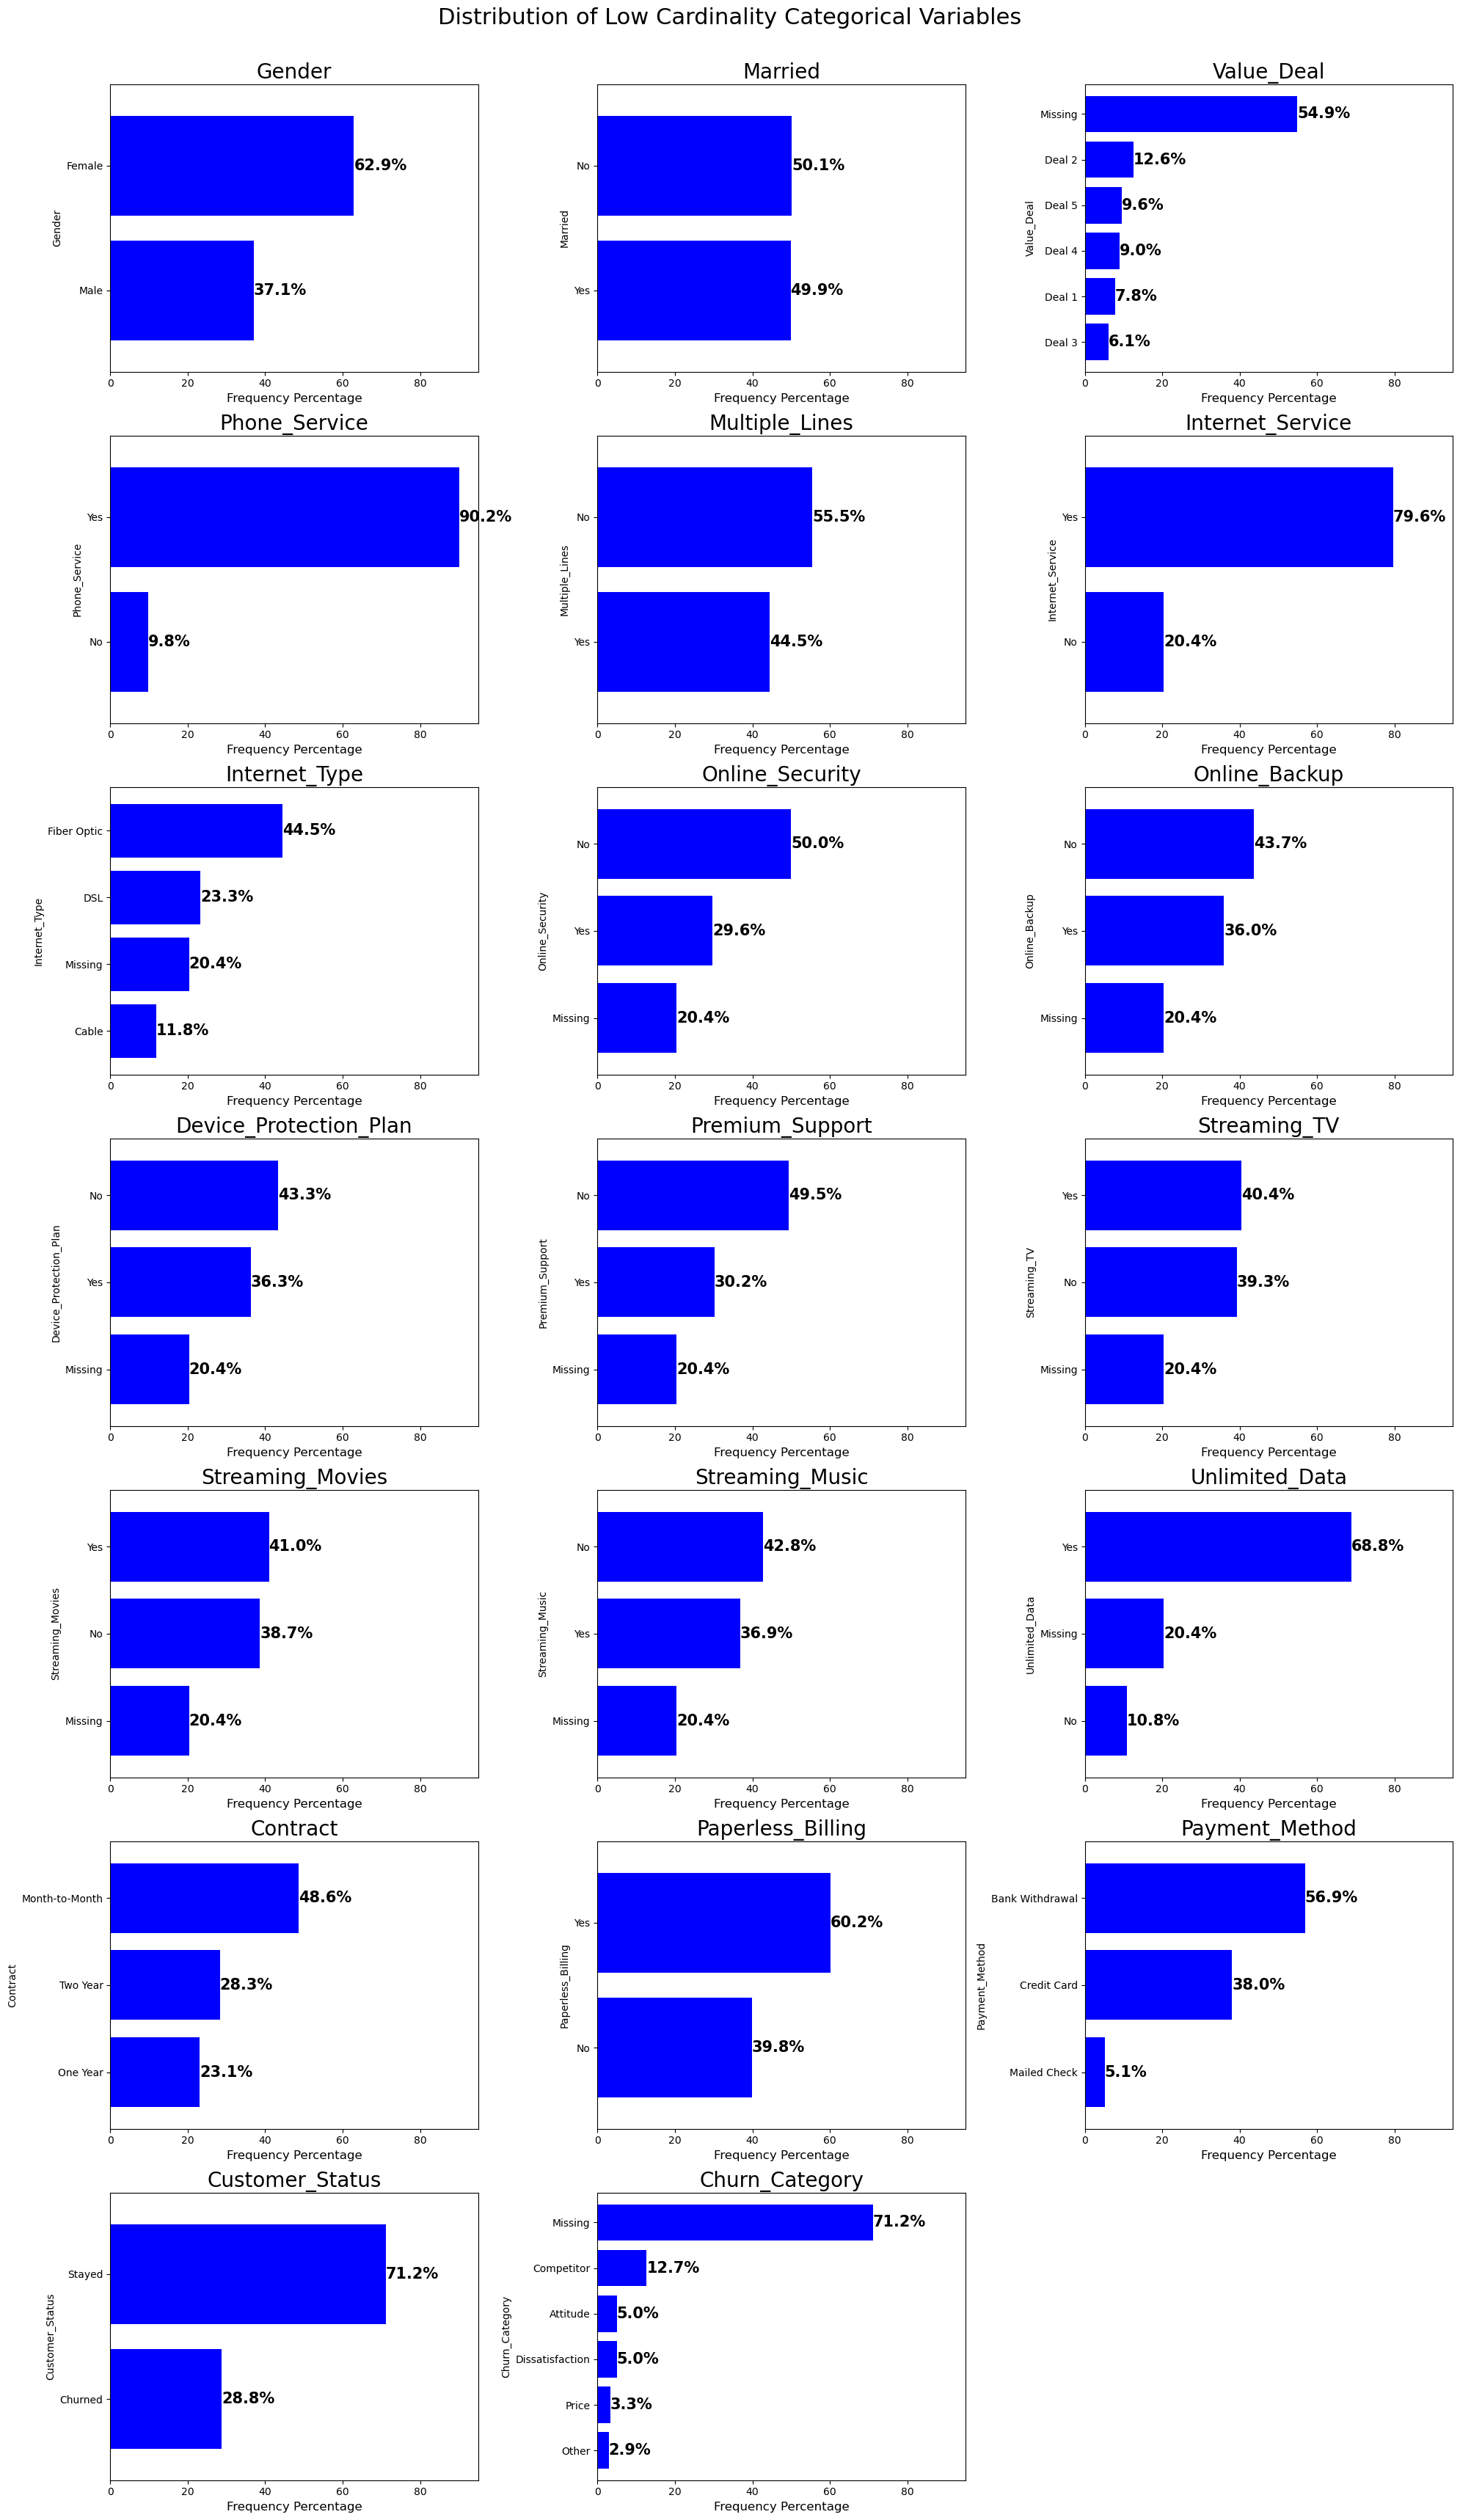

In [153]:
# Determine the number of rows needed
num_features = len(low_cardinality_fea)
num_rows = math.ceil(num_features / 3)

# Set up the subplot
fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5 * num_rows))

# Loop to plot bar charts for each categorical feature
for i, col in enumerate(low_cardinality_fea):
    row = i // 3
    col_idx = i % 3
    
    # Calculate frequency percentages
    value_counts = data[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='BLUE')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

# Hide any unused subplots
for i in range(num_features, num_rows * 3):
    fig.delaxes(ax.flatten()[i])

plt.suptitle('Distribution of Low Cardinality Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [154]:
categorical_columns = data.describe(include="object").columns
categorical_columns = list(categorical_columns)

In [155]:
#This is one simple way of finding out all the object columns
objectList=data.select_dtypes(include=['object']).columns.tolist()
print(objectList)
#There will be one more way of filtering the object type columsns, learn more in this case study later!

['Customer_ID', 'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Customer_Status', 'Churn_Category', 'Churn_Reason']


In [156]:

# List of binary categorical columns
bin_categorical_columns = ['Gender','Married','Phone_Service','Multiple_Lines','Internet_Service','Paperless_Billing','Customer_Status']

# Create the subplots (adjust cols to match the number of features)
fig = make_subplots(rows=1, cols=len(bin_categorical_columns), specs=[[{'type':'domain'}]*len(bin_categorical_columns)], 
                    vertical_spacing=0.01, horizontal_spacing=0.01)

# Loop through all the features and add the pie chart to the subplot
for i, feature in enumerate(bin_categorical_columns):
    value_counts = data[feature].value_counts()
    labels = value_counts.index.tolist()
    values = value_counts.values.tolist()

    # Define color map based on purple color
    cmap = colors.LinearSegmentedColormap.from_list("BLUE", ["BLUE", "white"])
    norm = colors.Normalize(vmin=0, vmax=len(labels))
    color_list = [colors.rgb2hex(cmap(norm(i))) for i in range(len(labels))]

    # Create the pie chart
    pie_chart = go.Pie(
        labels=labels,
        values=values,
        hole=0.6,
        marker=dict(colors=color_list, line=dict(color='white', width=3)),
        textposition='inside',
        textinfo='percent+label',
        title=feature,  # Add title with the feature name
        title_font=dict(size=25, color='black', family='Calibri')
    )

    # Add the pie chart to the subplot
    fig.add_trace(pie_chart, row=1, col=i+1)

# Update the layout
fig.update_layout(showlegend=False, height=400, width=990, 
                   title={
                          'text':"Distribution of Binary Categorical columns",
                          'y':0.90,
                          'x':0.5,
                          'xanchor':'center',
                          'yanchor':'top',
                          'font': {'size':28, 'color':'black', 'family':'Calibri'}
                         })

# Show the plot
fig.show()


In [157]:
#High Cardinality Categorical Features

In [158]:
#WE will focus on only TOP10 from each one

In [159]:
# Filter high cardinality features for the univariate analysis, excluding 'type' column
high_cardinality_fea = list((set(categorical_columns) - set(low_cardinality_fea)) - set(bin_categorical_columns))

# Filter the DataFrame for only high cardinality features
df_high_cardinality = data[high_cardinality_fea]


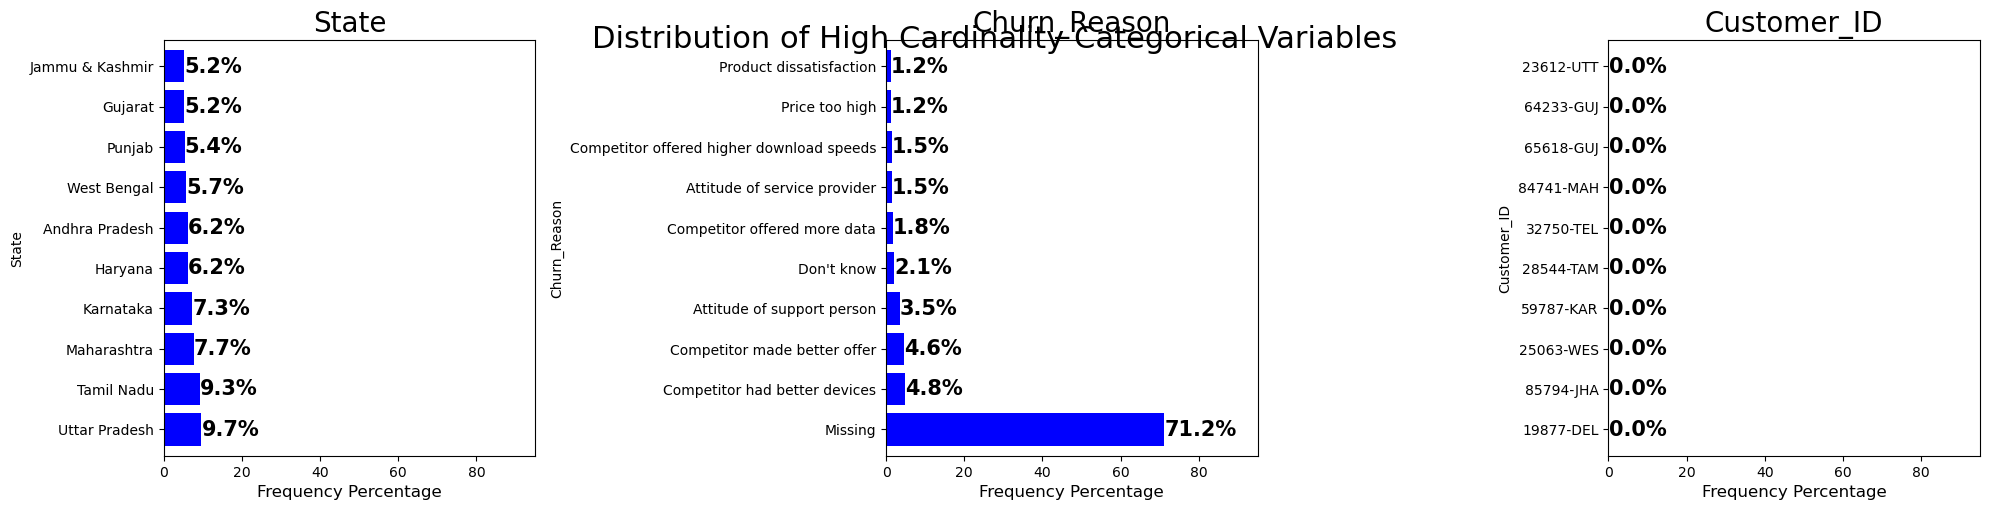

In [160]:
# Calculate the number of rows and columns dynamically based on the number of features
num_features = len(high_cardinality_fea)
ncols = 3  # Set a fixed number of columns
nrows = math.ceil(num_features / ncols)  # Dynamically calculate rows based on features

# Set up the subplot with dynamic row numbers
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 5))  # Adjust height based on rows

# Flatten ax to handle both 2D and 1D arrays (useful for dynamic plotting)
ax = ax.flatten()

# Loop to plot bar charts for each high cardinality categorical feature
for i, col in enumerate(high_cardinality_fea):
    # Calculate frequency percentages
    value_counts = data[col].value_counts(normalize=True).mul(100).sort_values(ascending=False).head(10)
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[i], width=0.8, color='BLUE')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[i].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[i].set_xlim([0, 95])
    ax[i].set_xlabel('Frequency Percentage', fontsize=12)
    ax[i].set_title(f'{col}', fontsize=20)

# Hide any unused subplots if num_features < total subplots
for j in range(i + 1, len(ax)):
    ax[j].axis('off')

# Add a main title and adjust the layout
plt.suptitle('Distribution of High Cardinality Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [32]:
#Bivariate Analysis

In [33]:
#Numerical Features vs Target

In [161]:
num_features = data.describe().columns
df_num = data[num_features]

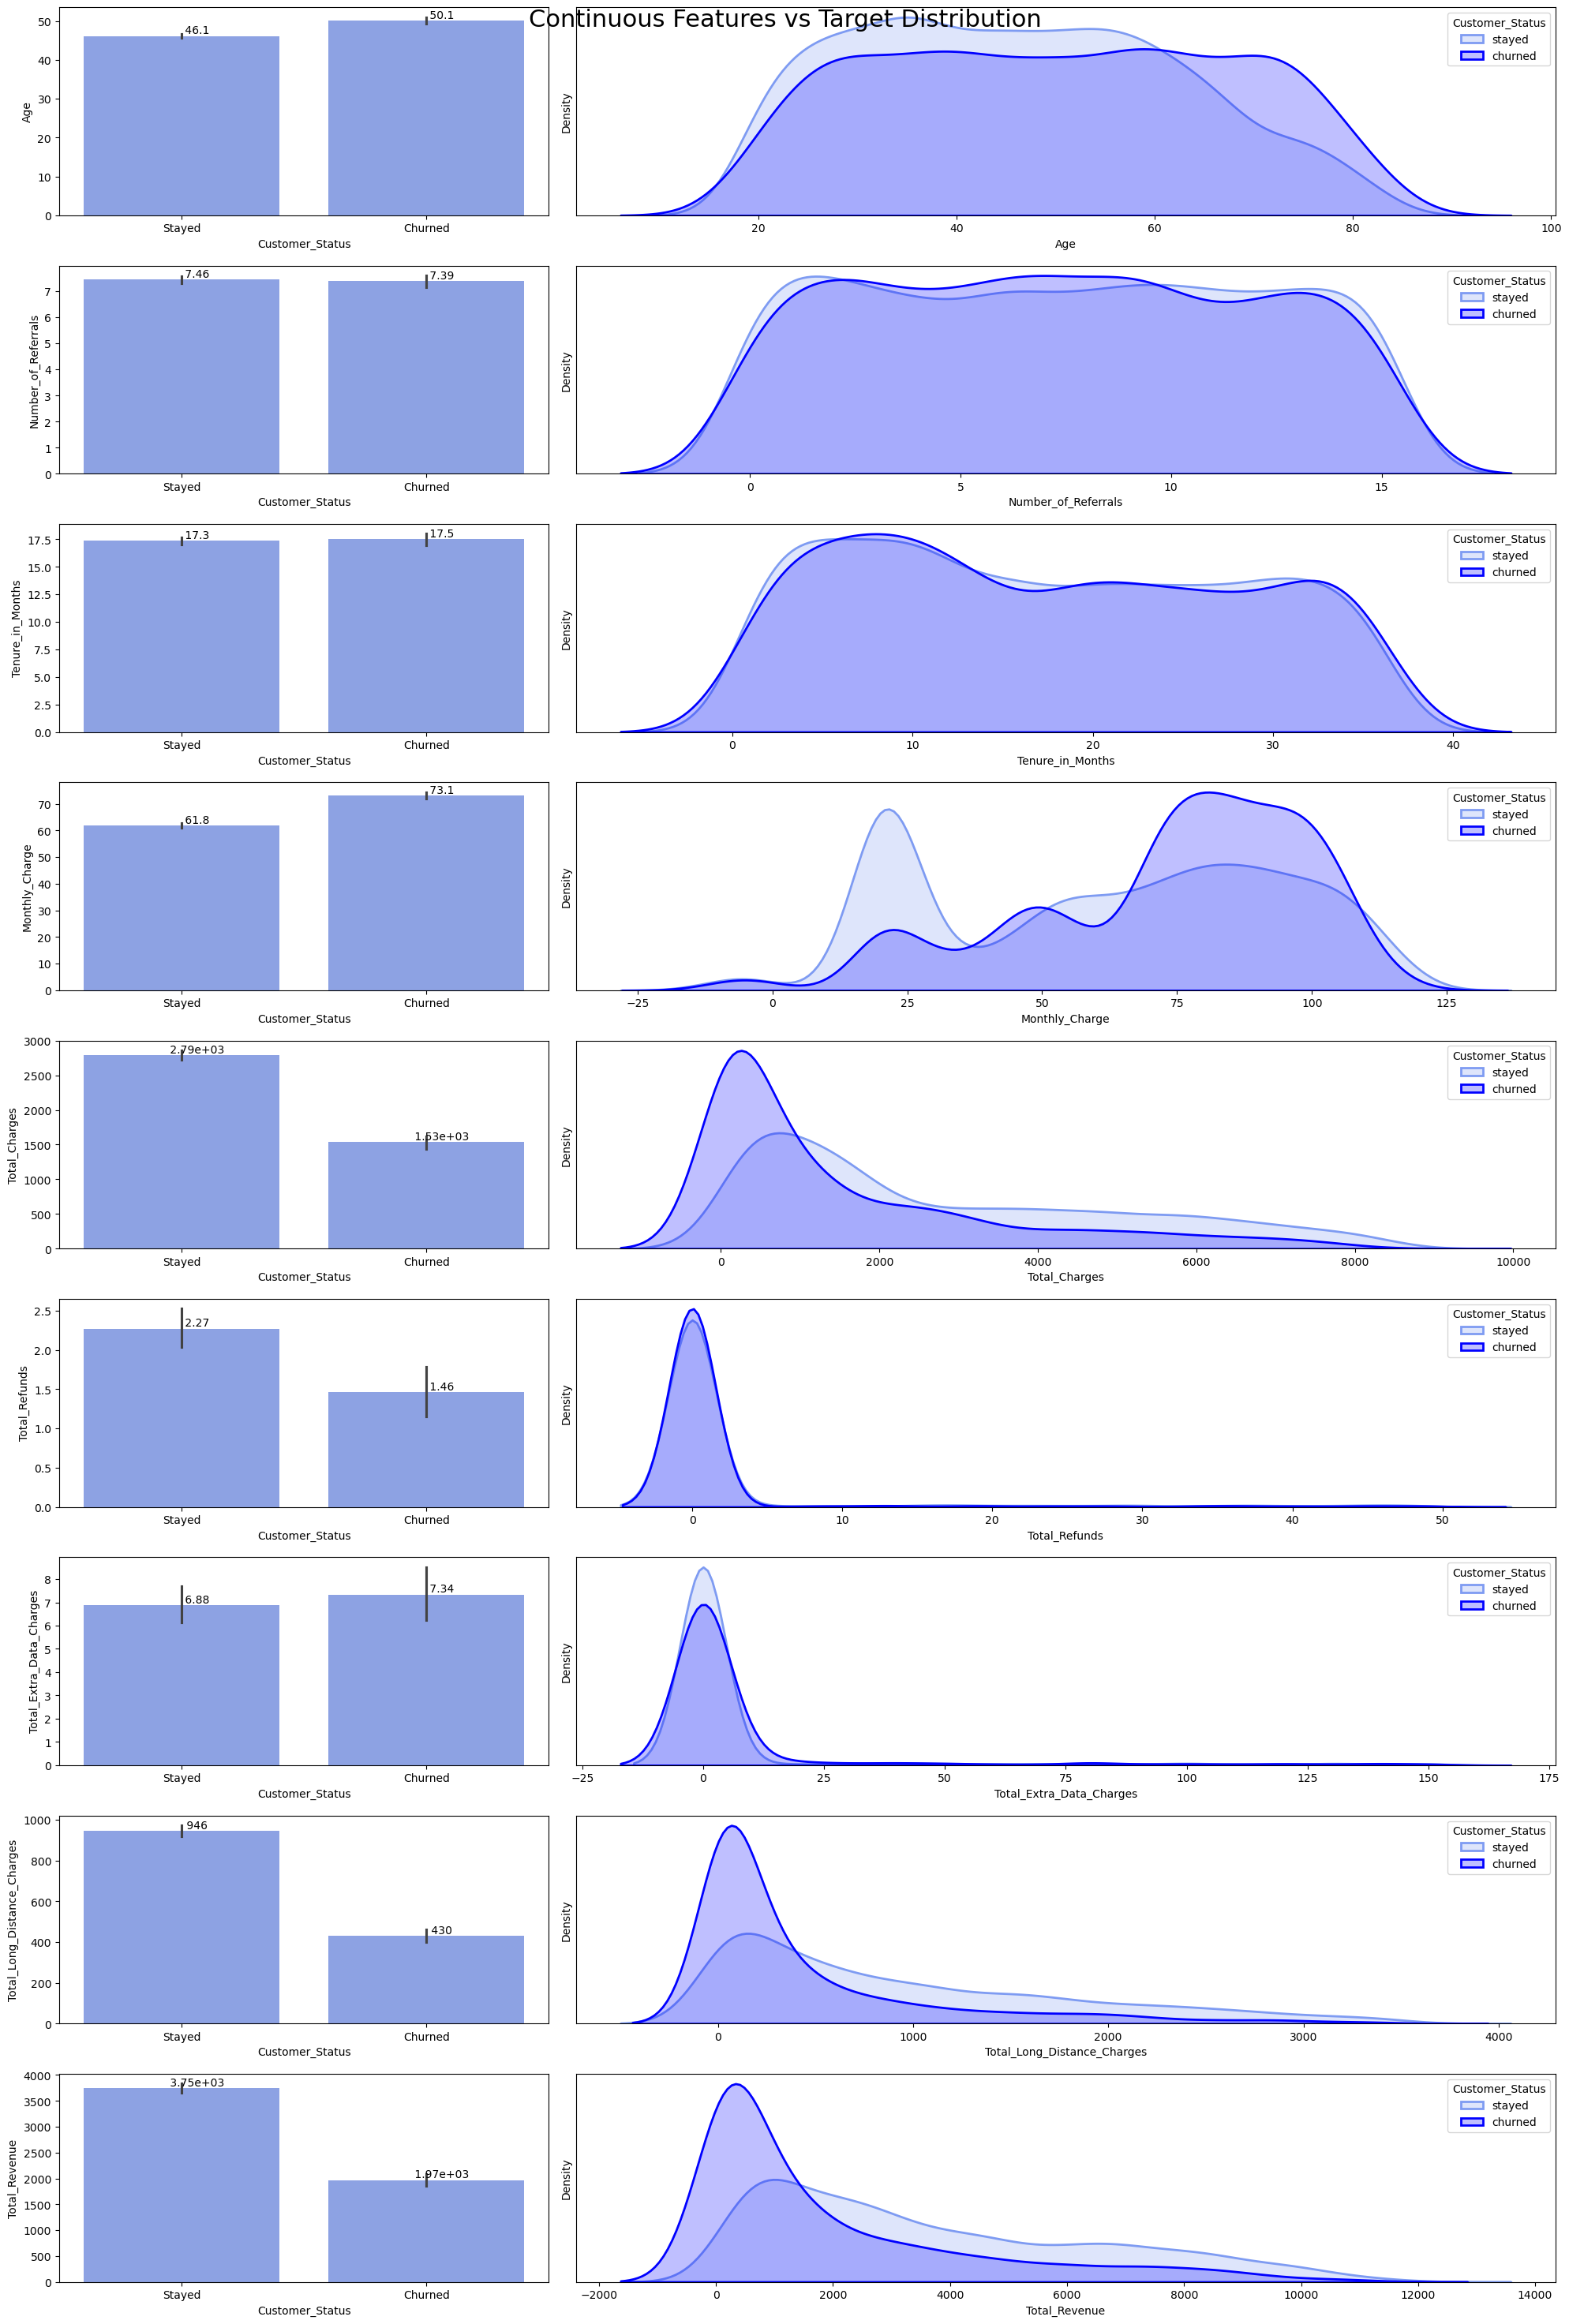

In [162]:
# Set color palette
sns.set_palette(['#7e9bf2', 'BLUE'])

# Create the subplots
fig, ax = plt.subplots(len(num_features), 2, figsize=(20,30), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(num_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=data, x="Customer_Status", y=col, ax=ax[i,0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=data[data["Customer_Status"]=='Stayed'], x=col, fill=True, linewidth=2, ax=ax[i,1], label='stayed')
    sns.kdeplot(data=data[data["Customer_Status"]=='Churned'], x=col, fill=True, linewidth=2, ax=ax[i,1], label='churned')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Customer_Status', loc='upper right')
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

In [163]:
#Categorical Features vs Target

In [164]:
#Low Cardinality Categorical Features vs Target

In [165]:
# Remove 'loan_status' from the low_cardinality_features
low_cardinality_fea = [feature for feature in low_cardinality_fea if feature != 'Customer_Status']

low_cardinality_fea


['Gender',
 'Married',
 'Value_Deal',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Internet_Type',
 'Online_Security',
 'Online_Backup',
 'Device_Protection_Plan',
 'Premium_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Streaming_Music',
 'Unlimited_Data',
 'Contract',
 'Paperless_Billing',
 'Payment_Method',
 'Churn_Category']

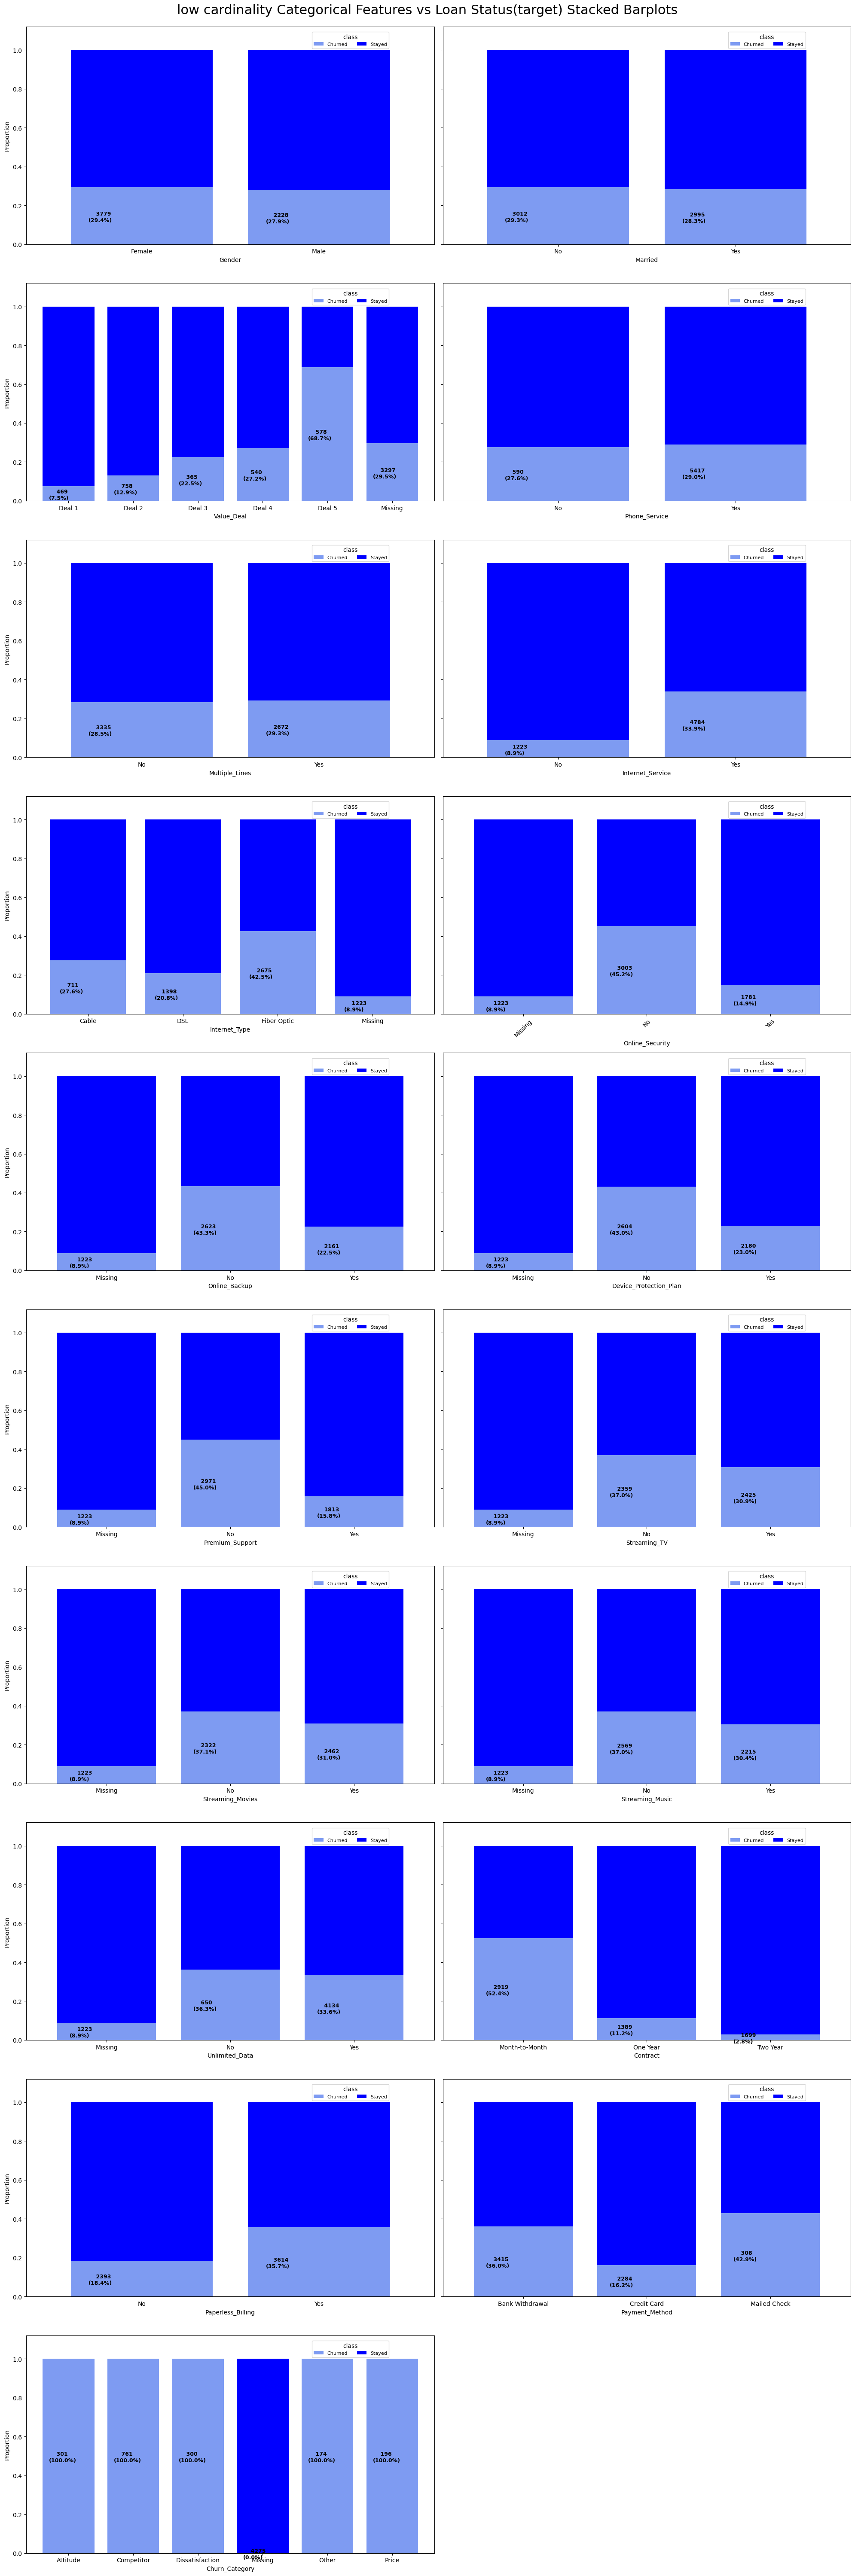

In [166]:

# Calculate the number of required subplots
num_plots = len(low_cardinality_fea)
num_rows = (num_plots + 1) // 2  # Add one extra row if the number of plots is odd

# Set up the subplot
fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, num_rows * 6))

for i, col in enumerate(low_cardinality_fea):
    # Calculate the row and column index
    x, y = i // 2, i % 2
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=data[col], columns=['Customer_Status'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=data[col], columns=data['Customer_Status'], normalize='index')   
    
    # Define colormap
    cmp = ListedColormap(['#7e9bf2', 'blue'])
    
    # Plot stacked bar charts
    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x, y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x, y].legend(title='class', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x, y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=0)
    
ax[3, 1].set_xticklabels(ax[3, 1].get_xticklabels(), rotation=45)   
# Remove empty subplot if the number of plots is odd
if num_plots % 2 != 0:
    fig.delaxes(ax[num_rows-1, 1])
    
# Set title outside the subplots
plt.suptitle('low cardinality Categorical Features vs Loan Status(target) Stacked Barplots', fontsize=22, y=0.999)
plt.tight_layout()                     
plt.show()

In [167]:
#High Cardinality Categorical Features vs Target

In [168]:
high_cardinality_fea

['State', 'Churn_Reason', 'Customer_ID']

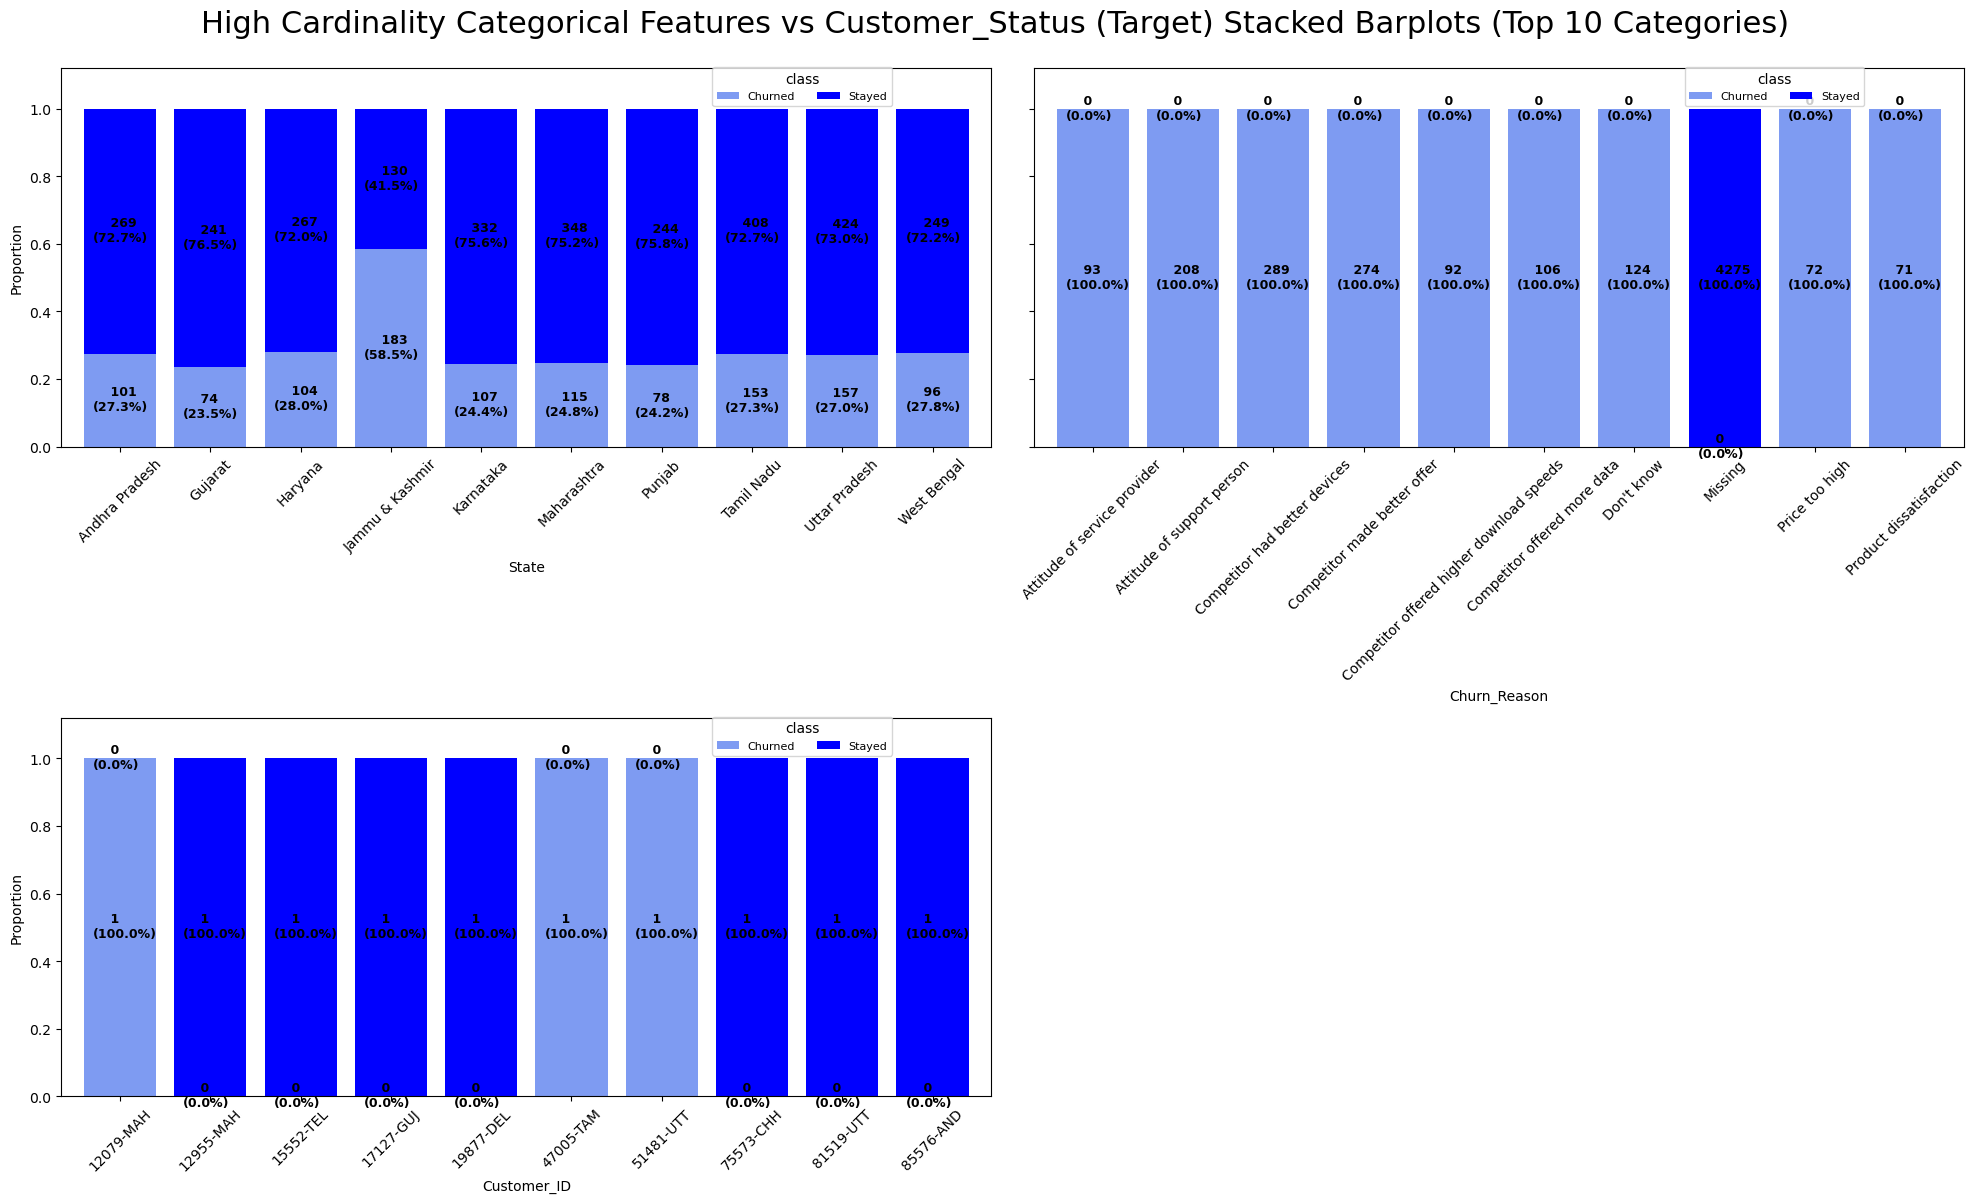

In [169]:
# Calculate the number of required subplots
num_plots = len(high_cardinality_fea)
num_rows = (num_plots + 1) // 2  # Add one extra row if the number of plots is odd

# Set up the subplot
fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, num_rows * 6))

for i, col in enumerate(high_cardinality_fea):
    # Calculate the row and column index
    x, y = i // 2, i % 2
    
    # Get the top 10 most occurring categories
    top_categories = data[col].value_counts().head(10).index
    
    # Subset the dataframe to include only the top 10 categories
    subset_df = data[data[col].isin(top_categories)]
    
    # Create a cross tabulation showing the proportion of loan statuses for each category of the feature
    cross_tab = pd.crosstab(index=subset_df[col], columns=subset_df['Customer_Status'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=subset_df[col], columns=subset_df['Customer_Status'], normalize='index')   
    
    # Define colormap
    cmp = ListedColormap(['#7e9bf2', 'blue'])
    
    # Plot stacked bar charts
    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x, y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x, y].legend(title='class', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x, y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=45)
    
# Remove empty subplot if the number of plots is odd
if num_plots % 2 != 0:
    fig.delaxes(ax[num_rows-1, 1])
    
# Set title outside the subplots
plt.suptitle('High Cardinality Categorical Features vs Customer_Status (Target) Stacked Barplots (Top 10 Categories)', fontsize=22, y=0.999)
plt.tight_layout()                     
plt.show()

In [170]:
#data processing
data.isnull().sum()

Customer_ID                    0
Gender                         0
Age                            0
Married                        0
State                          0
Number_of_Referrals            0
Tenure_in_Months               0
Value_Deal                     0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
Customer_Status                0
Churn_Cate

In [61]:
#Treating Outliers

In [171]:
Q1 = data[num_features].quantile(0.25)
Q3 = data[num_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((data[num_features] < (Q1 - 1.5 * IQR)) | (data[num_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

Age                              0
Number_of_Referrals              0
Tenure_in_Months                 0
Monthly_Charge                   0
Total_Charges                    0
Total_Refunds                  462
Total_Extra_Data_Charges       614
Total_Long_Distance_Charges    130
Total_Revenue                    8
dtype: int64

In [172]:
#Data Preprocessing

# Drop columns that won't be used for prediction

data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

 

# List of columns to be label encoded

columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]

 

# Encode categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])

 

# Manually encode the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

 

# Split data into features and target

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']

 

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:

#Train Random Forest Model

# Initialize the Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

 

# Train the model

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[795  46]
 [138 223]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       841
           1       0.83      0.62      0.71       361

    accuracy                           0.85      1202
   macro avg       0.84      0.78      0.80      1202
weighted avg       0.85      0.85      0.84      1202



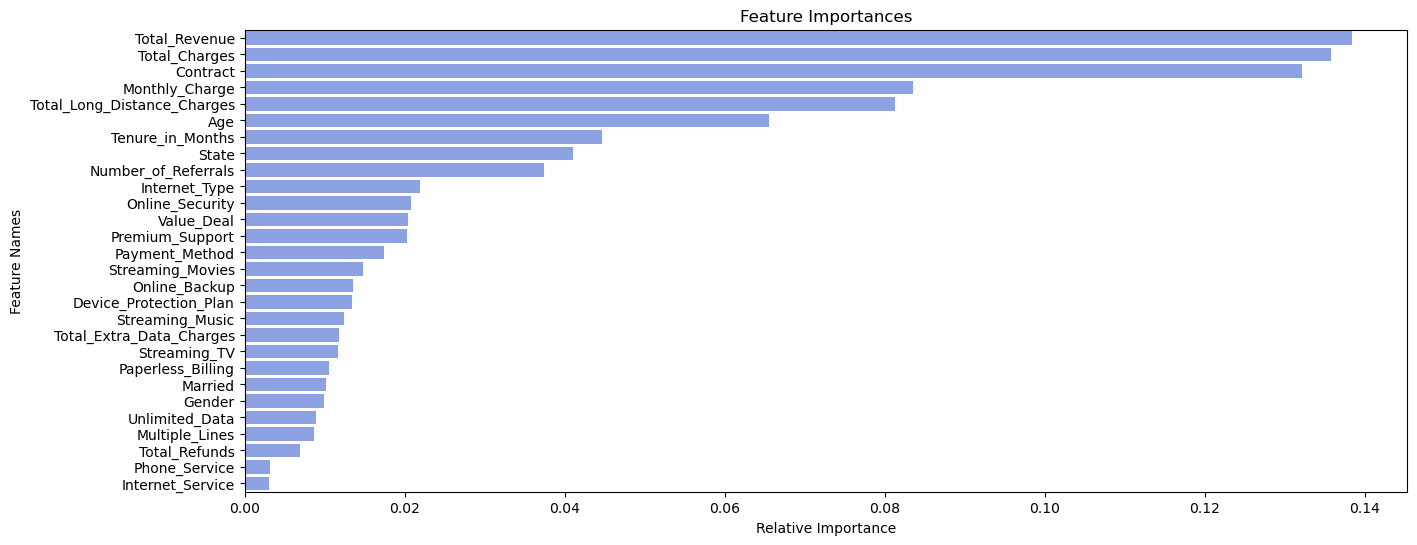

In [174]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X_train.columns[indices])  # X_train is used for feature names
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [178]:
import pandas as pd

# Define the path to the Joiner Data Excel file
file_path = r"C:\Users\Menka\Downloads\prediction_data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_joindata'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Check for NaN values in the DataFrame
print(new_data.isna().sum())

# Assuming new_data and label_encoders are defined

# Step 1: Handle missing values
new_data.fillna('Missing', inplace=True)

# Step 2: Transform with error handling
for column in new_data.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        try:
            new_data[column] = label_encoders[column].transform(new_data[column])
        except ValueError as e:
            print(f"Error transforming column '{column}': {e}")
            # Optionally handle unseen labels
            new_data[column] = new_data[column].apply(
                lambda x: label_encoders[column].transform([x])[0] if x in label_encoders[column].classes_ else -1
            )
    else:
        print(f"No encoder found for column: {column}")

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"C:\Users\Menka\Downloads\Predictions.csv", index=False)


  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   93520-GUJ  Female   67      No         Gujarat                   13   
1   57256-BIH  Female   18      No           Bihar                    9   
2   72357-MAD  Female   53      No  Madhya Pradesh                   14   
3   66612-KAR  Female   58     Yes       Karnataka                   11   
4   22119-WES    Male   31     Yes     West Bengal                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                19     Deal 5           Yes            Yes  ...   
1                 7        NaN           Yes             No  ...   
2                12     Deal 5           Yes             No  ...   
3                18        NaN           Yes             No  ...   
4                 5        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal          72.10          72.1           0.0   
1      Cre